In [9]:
import pyforest
from pyforest import *

In [2]:
from scipy.io import loadmat
import os

# Load SURF features for webcam and DSLR
surf_dir = 'data/surf/'

data_webcam = loadmat(os.path.join(surf_dir, 'webcam.mat'))
X_webcam = data_webcam['fts']   # Feature matrix
y_webcam = data_webcam['labels'].flatten()  # Labels (flatten to avoid issues with shape)

data_dslr = loadmat(os.path.join(surf_dir, 'dslr.mat'))
X_dslr = data_dslr['fts']  # Feature matrix
y_dslr = data_dslr['labels'].flatten()  # Labels


# Load CaffeNet features for webcam and DSLR
cafN_dir = 'data/CaffeNet/'

data_webcam = loadmat(os.path.join(surf_dir, 'webcam.mat'))
X_webcam_caf = data_webcam['fts']   # Feature matrix
y_webcam_caf = data_webcam['labels'].flatten()  # Labels (flatten to avoid issues with shape)

data_dslr = loadmat(os.path.join(surf_dir, 'dslr.mat'))
X_dslr_caf = data_dslr['fts']  # Feature matrix
y_dslr_caf = data_dslr['labels'].flatten()  # Labels



In [18]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply z-score normalization to both Webcam and DSLR feature matrices
X_webcam = scaler.fit_transform(X_webcam)  # Normalize Webcam features
X_dslr = scaler.fit_transform(X_dslr)      # Normalize DSLR features
X_webcam_caf = scaler.fit_transform(X_webcam_caf)  # Normalize Webcam features
X_dslr_caf = scaler.fit_transform(X_dslr_caf)      # Normalize DSLR features


In [19]:
# Checking the shape of the features and labels
print(f"Webcam feature matrix shape: {X_webcam.shape}")
print(f"DSLR feature matrix shape: {X_dslr.shape}")

print(f"Webcam labels shape: {y_webcam.shape}")
print(f"DSLR labels shape: {y_dslr.shape}")

# Get a quick overview of the data
print(f"First 5 labels in Webcam: {y_webcam[:5]}")
print(f"First 5 labels in DSLR: {y_dslr[:5]}")


Webcam feature matrix shape: (295, 800)
DSLR feature matrix shape: (157, 800)
Webcam labels shape: (295,)
DSLR labels shape: (157,)
First 5 labels in Webcam: [1 1 1 1 1]
First 5 labels in DSLR: [1 1 1 1 1]


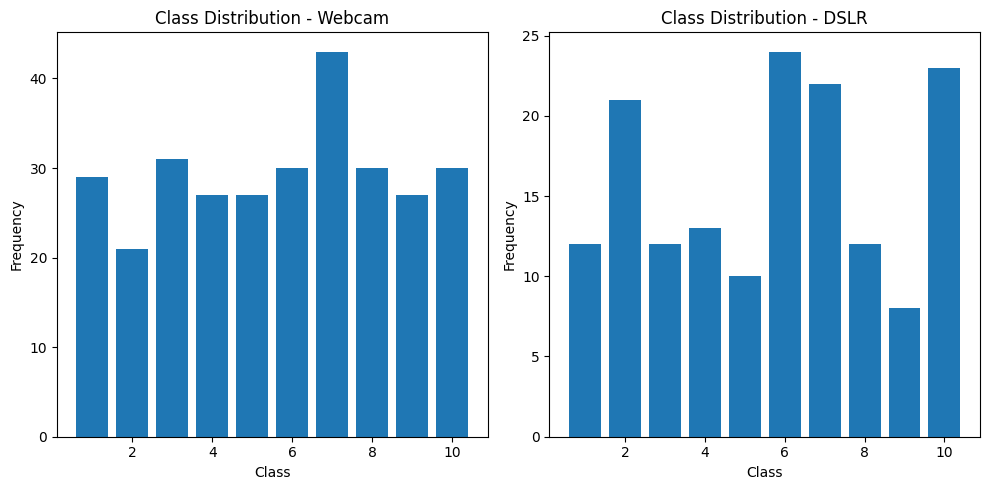

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Count the number of occurrences for each class in both domains
unique_webcam, counts_webcam = np.unique(y_webcam, return_counts=True)
unique_dslr, counts_dslr = np.unique(y_dslr, return_counts=True)

# Plot class distributions for Webcam and DSLR
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(unique_webcam, counts_webcam)
plt.title('Class Distribution - Webcam')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.bar(unique_dslr, counts_dslr)
plt.title('Class Distribution - DSLR')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [21]:
# Get a summary of statistics for the Webcam and DSLR feature matrices
print("Summary statistics for Webcam features:")
print(f"Mean: {np.mean(X_webcam, axis=0)[:5]}")
print(f"Standard deviation: {np.std(X_webcam, axis=0)[:5]}")
print(f"Min values: {np.min(X_webcam, axis=0)[:5]}")
print(f"Max values: {np.max(X_webcam, axis=0)[:5]}")

print("\nSummary statistics for DSLR features:")
print(f"Mean: {np.mean(X_dslr, axis=0)[:5]}")
print(f"Standard deviation: {np.std(X_dslr, axis=0)[:5]}")
print(f"Min values: {np.min(X_dslr, axis=0)[:5]}")
print(f"Max values: {np.max(X_dslr, axis=0)[:5]}")


Summary statistics for Webcam features:
Mean: [-6.02154861e-18 -6.92478090e-17  2.10754201e-17 -3.61292916e-17
  0.00000000e+00]
Standard deviation: [1. 1. 1. 1. 1.]
Min values: [-0.33879946 -0.22320857 -0.27972409 -0.35323712 -0.37355871]
Max values: [7.06459612 4.48011479 7.00132943 6.91687567 6.10878368]

Summary statistics for DSLR features:
Mean: [ 4.10146086e-17 -3.11145306e-17  2.82859369e-17  2.26287495e-17
  0.00000000e+00]
Standard deviation: [1. 1. 1. 1. 1.]
Min values: [-0.39109904 -0.18136906 -0.24375005 -0.41479911 -0.35737304]
Max values: [4.1572379  5.5136195  5.79868547 5.50551545 5.87680104]


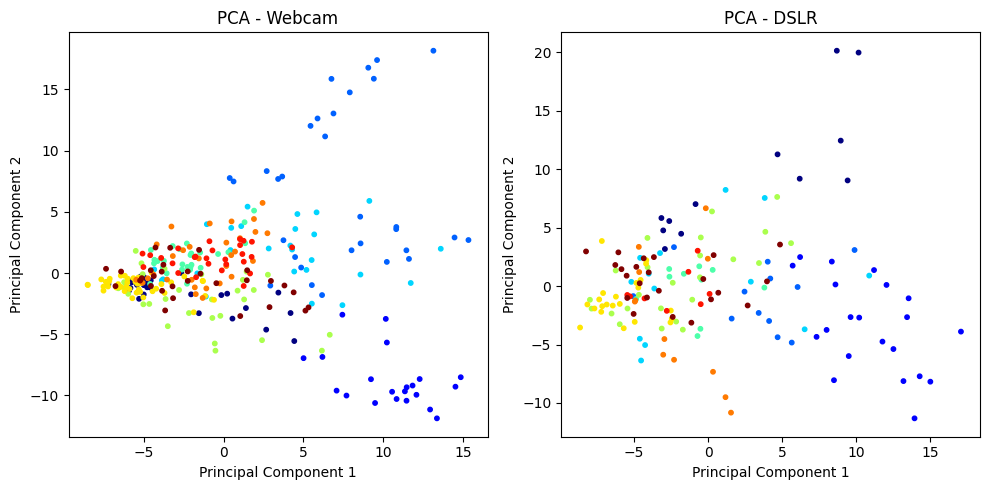

In [22]:
from sklearn.decomposition import PCA

# Reduce dimensionality of both datasets to 2D using PCA
pca = PCA(n_components=2)
X_webcam_pca = pca.fit_transform(X_webcam)
X_dslr_pca = pca.fit_transform(X_dslr)

# Plot the 2D projections of both domains
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_webcam_pca[:, 0], X_webcam_pca[:, 1], c=y_webcam, cmap='jet', s=10)
plt.title('PCA - Webcam')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
plt.scatter(X_dslr_pca[:, 0], X_dslr_pca[:, 1], c=y_dslr, cmap='jet', s=10)
plt.title('PCA - DSLR')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


## 1. Compute Principal Components (PCA)

In [39]:
from sklearn.decomposition import PCA

# Number of principal components to keep
d = 33

# Compute PCA for the source (Webcam) and target (DSLR)
pca_webcam = PCA(n_components=d)
pca_dslr = PCA(n_components=d)

# Project the data into the subspaces
Xs = pca_webcam.fit_transform(X_webcam)  # Projected source data
Xt = pca_dslr.fit_transform(X_dslr)      # Projected target data

# Principal components (basis vectors for subspaces)
webcam_pcs = pca_webcam.components_  # Source domain basis (Xs)
dslr_pcs = pca_dslr.components_      # Target domain basis (Xt)


# 2. Project the Data onto These Subspaces

After computing the principal components, we project both the source (Webcam) and target (DSLR) datasets into their respective subspaces. The result is Ŝ for the source and T̂ for the target.

In [40]:
# Project the data onto the principal components
S_hat = X_webcam @ webcam_pcs.T  # Projected source data in new subspace
T_hat = X_dslr @ dslr_pcs.T      # Projected target data in new subspace


In [41]:
# Compute the alignment matrix
M = webcam_pcs.T @ dslr_pcs


In [42]:
# Align the source principal components (before projecting the data)
aligned_webcam_pcs = webcam_pcs @ M

# Project the source data (X_webcam_normalized) onto the aligned source subspace
S_hat_aligned = X_webcam @ aligned_webcam_pcs.T


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Fit a 1-NN classifier on the aligned source data
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(S_hat_aligned, y_webcam)

# Predict labels for the target data using the aligned source data
y_pred = knn.predict(T_hat)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_dslr, y_pred)
print(f'Accuracy of subspace alignment: {accuracy:.4f}')


Accuracy of subspace alignment: 0.8917


In [44]:
# Fit a 1-NN classifier on the raw source data (without alignment)
knn_raw = KNeighborsClassifier(n_neighbors=1)
knn_raw.fit(X_webcam, y_webcam)

# Predict labels for the target data without alignment
y_pred_raw = knn_raw.predict(X_dslr)

# Evaluate the accuracy of the classifier on raw data
accuracy_raw = accuracy_score(y_dslr, y_pred_raw)
print(f'Accuracy without alignment: {accuracy_raw:.4f}')


Accuracy without alignment: 0.3057


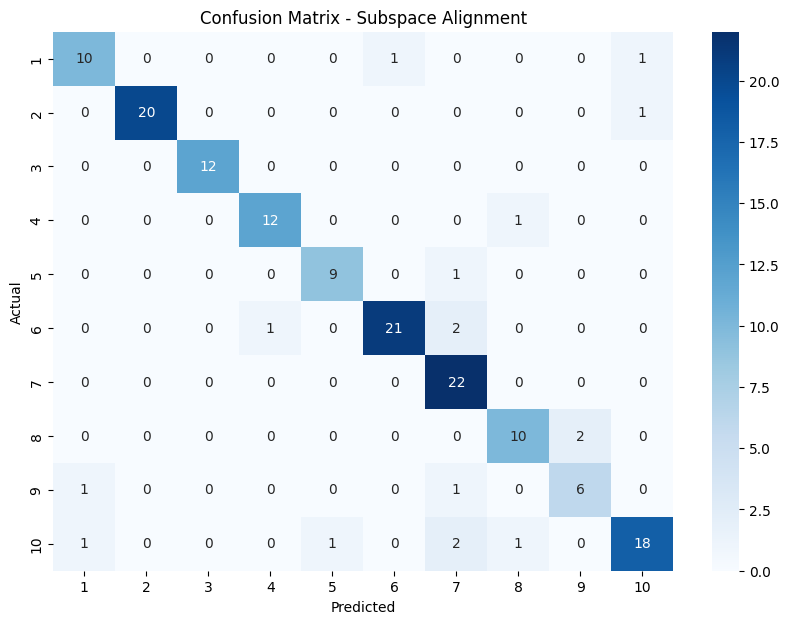

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_dslr, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_dslr, yticklabels=unique_dslr)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Subspace Alignment')
plt.show()


# d tuning

Baseline accuracy without alignment: 0.3057
Accuracy for d=1: 0.2484
Accuracy for d=2: 0.3885
Accuracy for d=3: 0.4459
Accuracy for d=4: 0.5796
Accuracy for d=5: 0.6242
Accuracy for d=6: 0.6815
Accuracy for d=7: 0.7134
Accuracy for d=8: 0.7707
Accuracy for d=9: 0.7771
Accuracy for d=10: 0.8089
Accuracy for d=11: 0.7516
Accuracy for d=12: 0.8280
Accuracy for d=13: 0.8025
Accuracy for d=14: 0.8280
Accuracy for d=15: 0.8344
Accuracy for d=16: 0.8153
Accuracy for d=17: 0.8153
Accuracy for d=18: 0.8280
Accuracy for d=19: 0.8726
Accuracy for d=20: 0.8535
Accuracy for d=21: 0.8917
Accuracy for d=22: 0.8726
Accuracy for d=23: 0.8471
Accuracy for d=24: 0.8726
Accuracy for d=25: 0.8726
Accuracy for d=26: 0.8535
Accuracy for d=27: 0.8790
Accuracy for d=28: 0.8599
Accuracy for d=29: 0.8535
Accuracy for d=30: 0.8790
Accuracy for d=31: 0.8662
Accuracy for d=32: 0.8726
Accuracy for d=33: 0.8790
Accuracy for d=34: 0.8981
Accuracy for d=35: 0.8917
Accuracy for d=36: 0.9045
Accuracy for d=37: 0.8790
Acc

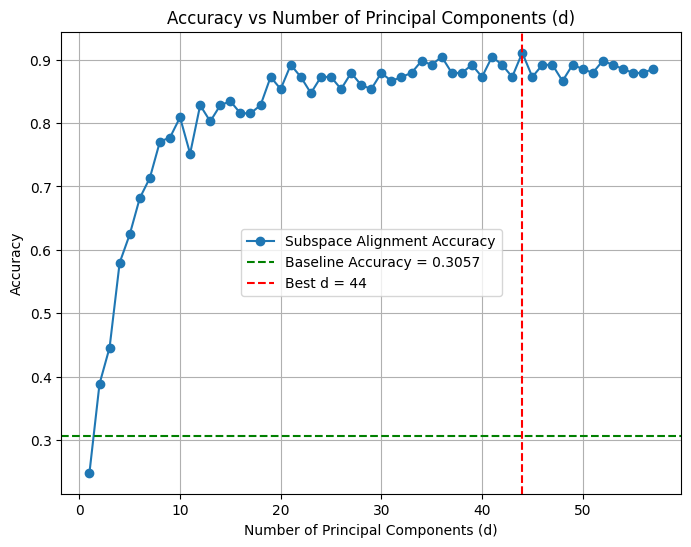

Best accuracy: 0.9108 at d = 44


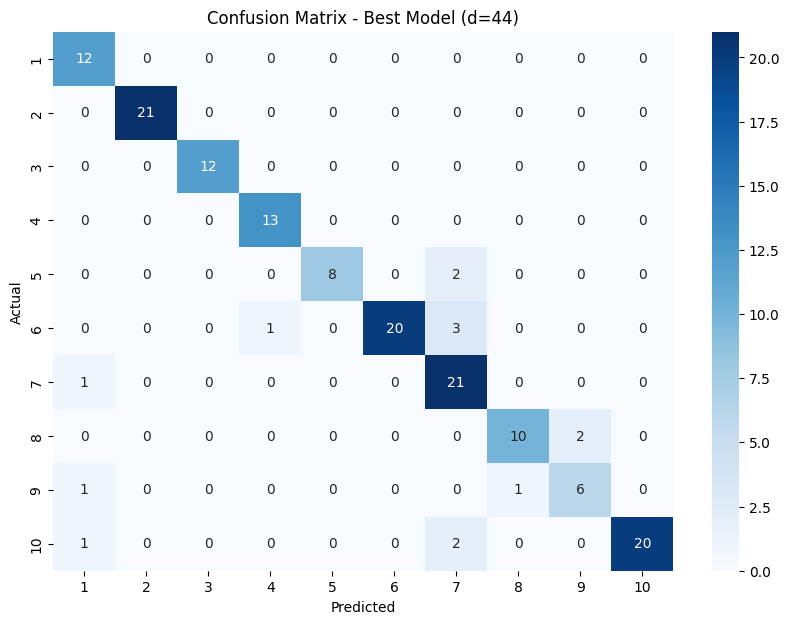

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Set a random seed for reproducibility
random_state = 42

# List of d values to test (number of principal components)
d_values = np.arange(1, 58, 1)

# List to store accuracies for each d
accuracies = []
best_accuracy = 0
best_d = 0
best_y_pred = None  # To store the predictions of the best model

# Step 1: Fit the baseline 1-NN classifier without subspace alignment
knn_raw = KNeighborsClassifier(n_neighbors=1)
knn_raw.fit(X_webcam, y_webcam)
y_pred_raw = knn_raw.predict(X_dslr)
accuracy_raw = accuracy_score(y_dslr, y_pred_raw)
print(f'Baseline accuracy without alignment: {accuracy_raw:.4f}')

# Step 2: Perform subspace alignment and compare for different d values
for d in d_values:
    # Compute PCA for source and target with d principal components
    pca_webcam = PCA(n_components=d, random_state=random_state)  # Set random_state
    pca_dslr = PCA(n_components=d, random_state=random_state)    # Set random_state
    
    # Project the data into the subspaces
    Xs = pca_webcam.fit_transform(X_webcam)  # Projected source data
    Xt = pca_dslr.fit_transform(X_dslr)      # Projected target data
    
    # Compute the alignment matrix
    M = pca_webcam.components_.T @ pca_dslr.components_
    
    # Align the source principal components (before projecting the data)
    aligned_webcam_pcs = pca_webcam.components_ @ M
    
    # Project the source data onto the aligned subspace
    S_hat_aligned = X_webcam @ aligned_webcam_pcs.T
    
    # Fit a 1-NN classifier on the aligned source data
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(S_hat_aligned, y_webcam)
    
    # Predict labels for the target data
    y_pred = knn.predict(Xt)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(y_dslr, y_pred)
    accuracies.append(accuracy)
    
    # Check if this is the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_d = d
        best_y_pred = y_pred  # Store the predictions of the best model
    
    print(f'Accuracy for d={d}: {accuracy:.4f}')

# Step 3: Plot accuracy vs d and include the baseline
plt.figure(figsize=(8, 6))
plt.plot(d_values, accuracies, marker='o', label='Subspace Alignment Accuracy')
plt.axhline(y=accuracy_raw, color='g', linestyle='--', label=f'Baseline Accuracy = {accuracy_raw:.4f}')
plt.axvline(x=best_d, color='r', linestyle='--', label=f'Best d = {best_d}')
plt.title('Accuracy vs Number of Principal Components (d)')
plt.xlabel('Number of Principal Components (d)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Output the best accuracy and corresponding d value
print(f'Best accuracy: {best_accuracy:.4f} at d = {best_d}')

# Step 4: Generate confusion matrix for the best model
cm = confusion_matrix(y_dslr, best_y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_dslr), yticklabels=np.unique(y_dslr))
plt.title(f'Confusion Matrix - Best Model (d={best_d})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
